In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from matplotlib import pyplot as plt
import numpy as np


def pg(named_parameters):
    '''Plots the gradients flowing through different layers in the net during training.
    Can be used for checking for possible gradient vanishing / exploding problems.
    
    Usage: Plug this function in Trainer class after loss.backwards() as 
    "plot_grad_flow(self.model.named_parameters())" to visualize the gradient flow'''
    ave_grads = []
    max_grads= []
    layers = []
    for n, p in named_parameters:
        if(p.requires_grad) and ("bias" not in n):
            layers.append(n)
            ave_grads.append(p.grad.abs().mean())
            max_grads.append(p.grad.abs().max())
    plt.bar(np.arange(len(max_grads)), max_grads, alpha=0.1, lw=1, color="c")
    plt.bar(np.arange(len(max_grads)), ave_grads, alpha=0.1, lw=1, color="b")
    plt.hlines(0, 0, len(ave_grads)+1, lw=2, color="k" )
    plt.xticks(range(0,len(ave_grads), 1), layers, rotation="vertical")
    plt.xlim(left=0, right=len(ave_grads))
    plt.ylim(bottom = -0.001, top=0.02) # zoom in on the lower gradient regions
    plt.xlabel("Layers")
    plt.ylabel("average gradient")
    plt.title("Gradient flow")
    plt.grid(True)
    plt.legend([Line2D([0], [0], color="c", lw=4),
                Line2D([0], [0], color="b", lw=4),
                Line2D([0], [0], color="k", lw=4)], ['max-gradient', 'mean-gradient', 'zero-gradient'])

NameError: name 'Line2D' is not defined

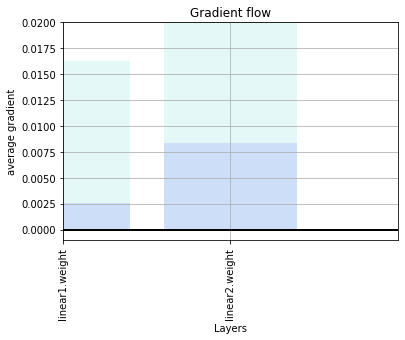

In [2]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)
    def forward(self, x):
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred
N, D_in, H, D_out = 64, 1000, 100, 10


x = Variable(torch.randn(N, D_in))
w = Variable(torch.randn(N, D_in), requires_grad=True)
y = torch.randn(N, D_out)
model = TwoLayerNet(D_in, H, D_out)

criterion = torch.nn.MSELoss()
# criterion = torch.nn.SmoothL1Loss()
# criterion = torch.nn.L1Loss()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
for t in range(200):
    y_pred = model(x)
    # M = model(w)
    
    loss = criterion(y_pred, y)
    
   
    # print(t, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    pg(model.named_parameters())
    optimizer.step()